In [2]:
#Basic Libraries
import pandas as pd
import numpy as np

In [6]:
#Visualisation Libarries
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Preprocessing and Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [11]:
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

# Save Models
import joblib


In [12]:
# Display Settings
pd.set_option('display.max_columns', None)

In [51]:
#Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\adult_cleaned.csv")

In [52]:
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,Not-known,103497,Some-college,10,Never-married,Not-known,Own-child,White,Female,0,0,30,United-States,<=50K
4,29,Not-known,227026,HS-grad,9,Never-married,Not-known,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42434 entries, 0 to 42433
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              42434 non-null  int64 
 1   workclass        42434 non-null  object
 2   fnlwgt           42434 non-null  int64 
 3   education        42434 non-null  object
 4   educational-num  42434 non-null  int64 
 5   marital-status   42434 non-null  object
 6   occupation       42434 non-null  object
 7   relationship     42434 non-null  object
 8   race             42434 non-null  object
 9   gender           42434 non-null  object
 10  capital-gain     42434 non-null  int64 
 11  capital-loss     42434 non-null  int64 
 12  hours-per-week   42434 non-null  int64 
 13  native-country   42434 non-null  object
 14  income           42434 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.9+ MB


In [54]:
# Check for missing values
df.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [55]:
# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Show cleaned data
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,4,89814,4,9,2,4,0,4,1,0,0,50,39,0
1,28,1,336951,0,12,2,11,0,4,1,0,0,40,39,1
2,44,4,160323,7,10,2,6,0,2,1,7688,0,40,39,1
3,18,3,103497,7,10,4,7,3,4,0,0,0,30,39,0
4,29,3,227026,4,9,4,7,4,2,1,0,0,40,39,0


In [56]:
import os
os.makedirs("models", exist_ok=True)


In [57]:
from sklearn.preprocessing import StandardScaler
import joblib

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # after X is defined

# Save the scaler
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [58]:
import os
print(os.path.exists("models/scaler.pkl"))


True


In [59]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for Streamlit use
joblib.dump(scaler, 'models/scaler.pkl')


['models/scaler.pkl']

In [60]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}  # To store performance

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results[name] = {'R2 Score': r2, 'MSE': mse}
    
    # Save model
    model_filename = f"models/{name.replace(' ', '_')}.pkl"
    joblib.dump(model, model_filename)


In [28]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Show metrics
results_df


,R2 Score,MSE
Linear Regression,0.258615,0.133052
Decision Tree,-0.020711,0.183181
Random Forest,0.454590,0.097882
Gradient Boosting,0.485963,0.092252


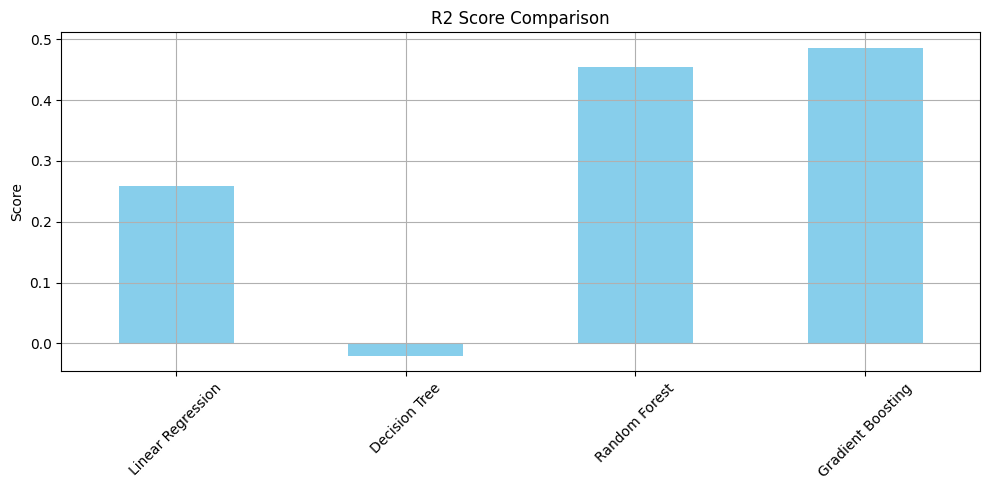

In [30]:
# Bar plot comparison
import os
os.makedirs("images", exist_ok=True)  # Create folder if not exists
plt.figure(figsize=(10,5))
results_df["R2 Score"].plot(kind='bar', color='skyblue')
plt.title("R2 Score Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("images/model_comparison.png")  # Save for PPT
plt.show()


In [31]:
# Test with a custom input (just 5 features for demo)
sample = X_test[0].reshape(1, -1)
for name, model in models.items():
    pred_salary = model.predict(sample)[0]
    print(f"{name}: ₹{pred_salary:.2f}")


Linear Regression: ₹0.19
Decision Tree: ₹0.00
Random Forest: ₹0.00
Gradient Boosting: ₹0.00


In [32]:
print("✅ All models trained and saved successfully!")
print("📊 Model comparison chart saved to images/model_comparison.png")
print("📁 You can now run the Streamlit app using: streamlit run app.py")


✅ All models trained and saved successfully!
📊 Model comparison chart saved to images/model_comparison.png
📁 You can now run the Streamlit app using: streamlit run app.py


In [34]:
# Get model with highest R²
best_model_name = max(results.items(), key=lambda x: x[1]['R2 Score'])[0]
best_model = models[best_model_name]

print(f"Best model is: {best_model_name}")
joblib.dump(best_model, f"models/{best_model_name.replace(' ', '_')}.pkl")


Best model is: Gradient Boosting


['models/Gradient_Boosting.pkl']

In [35]:
import joblib

joblib.dump(best_model, "models/Random_Forest.pkl")
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [36]:
import os
import joblib

# Define the full path to your VS Code project
save_path = "C:/Users/hp/OneDrive/Desktop/Employee Salary Prediction/models"

# Make sure the 'models' folder exists
os.makedirs(save_path, exist_ok=True)

# Save the trained model
joblib.dump(models["Random Forest"], os.path.join(save_path, "Random_Forest.pkl"))

# Save the scaler
joblib.dump(scaler, os.path.join(save_path, "scaler.pkl"))


['C:/Users/hp/OneDrive/Desktop/Employee Salary Prediction/models\\scaler.pkl']

In [39]:
import os
os.makedirs("images", exist_ok=True)
plt.savefig("images/model_comparison.png")


<Figure size 640x480 with 0 Axes>

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
joblib.dump(clf, "models/Random_Forest.pkl")


['models/Random_Forest.pkl']

In [42]:
from sklearn.utils import resample

# Combine into one frame
df_bal = pd.concat([X, y], axis=1)

# Separate majority and minority
df_majority = df_bal[df_bal['income'] == 0]
df_minority = df_bal[df_bal['income'] == 1]

# Upsample minority
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine and shuffle
df_balanced = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1)

# Redefine X, y
X = df_balanced.drop('income', axis=1)
y = df_balanced['income']


In [46]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


os.makedirs("models", exist_ok=True)

# Train and save Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
joblib.dump(rf, "models/Random_Forest.pkl")

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
joblib.dump(dt, "models/Decision_Tree.pkl")

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
joblib.dump(gb, "models/Gradient_Boosting.pkl")

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
joblib.dump(knn, "models/KNN.pkl")

# Neural Network
nn = MLPClassifier(max_iter=300)
nn.fit(X_train, y_train)
joblib.dump(nn, "models/Neural_Network.pkl")

# Save the scaler too if not already saved
joblib.dump(scaler, "models/scaler.pkl")


['models/scaler.pkl']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example: df is your full preprocessed DataFrame, and 'income' is the target
X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Make directory if it doesn't exist
os.makedirs("models", exist_ok=True)

# Train models
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()
knn = KNeighborsClassifier()
nn = MLPClassifier(max_iter=300)

# Fit models
rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
nn.fit(X_train_scaled, y_train)

# Save all models
joblib.dump(rf, "models/Random_Forest.pkl")
joblib.dump(dt, "models/Decision_Tree.pkl")
joblib.dump(gb, "models/Gradient_Boosting.pkl")
joblib.dump(knn, "models/KNN.pkl")
joblib.dump(nn, "models/Neural_Network.pkl")

# Save the scaler
joblib.dump(scaler, "models/scaler.pkl")

print("✅ All models and scaler saved to 'models/' folder.")


✅ All models and scaler saved to 'models/' folder.


In [49]:
import os

print("📂 Current Working Directory:")
print(os.getcwd())

print("\n📁 Files in models/:")
print(os.listdir("models"))


📂 Current Working Directory:
C:\Users\hp

📁 Files in models/:
['Decision_Tree.pkl', 'Gradient_Boosting.pkl', 'KNN.pkl', 'Linear_Regression.pkl', 'Neural_Network.pkl', 'Random_Forest.pkl', 'scaler.pkl']


In [50]:
df = pd.read_csv(r"C:\Users\hp\Downloads\adult 3 (1).csv")